### Gold Price Prediction using Random Forest

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [2]:
goldprice_dataset = pd.read_csv("/Users/pavansaipendry/Desktop/Master's/Sem 1/Machine Learning/Projects/Gold Price Prediction/gld_price_data.csv")

In [3]:
goldprice_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
goldprice_dataset.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

In [5]:
goldprice_dataset.shape

(2290, 6)

In [6]:
goldprice_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation

In [7]:
corr = goldprice_dataset.corr(numeric_only=True)
corr

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


HeatMap

<Axes: >

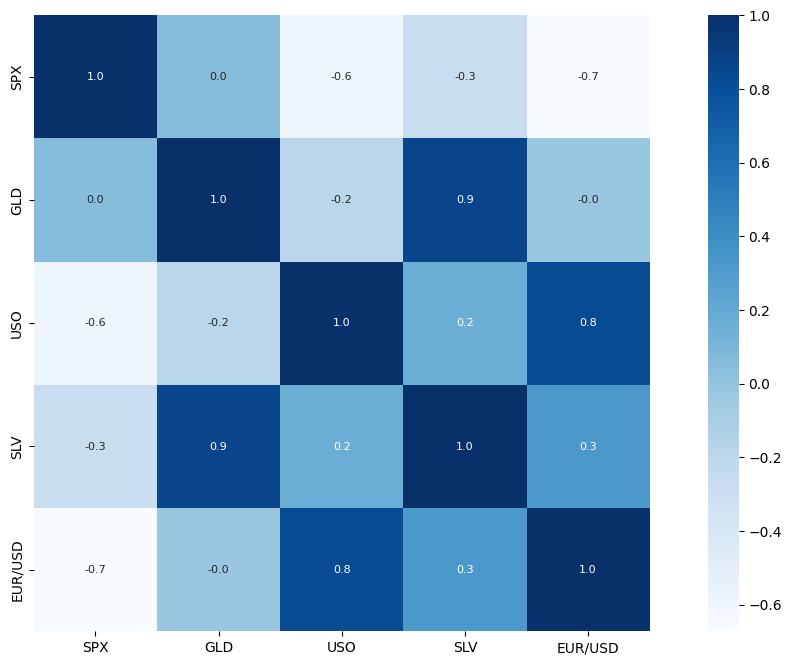

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(corr , cbar = True , square=True ,fmt = '.1f' , annot=True,annot_kws={'size':8} , cmap="Blues")

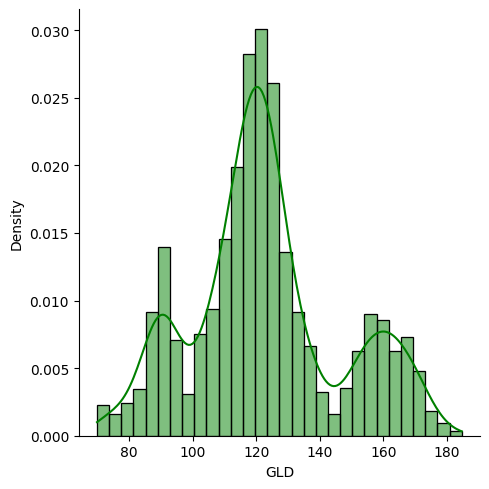

In [9]:
sns.displot(goldprice_dataset['GLD'], bins=30, kde=True,color='green' , edgecolor='black', stat='density')

Removing the Date column so that we can perform training and testing

In [10]:
# goldprice_dataset = goldprice_dataset.drop(['Date'], axis=1)

In [11]:
goldprice_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [12]:
X = goldprice_dataset.drop(['Date' , 'GLD'], axis=1)
Y = goldprice_dataset['GLD']
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Standardization of data

In [13]:
scaler = StandardScaler()
standarad_scaler = scaler.fit_transform(X)

In [14]:
standarad_scaler

array([[-0.39914541,  2.38880956, -0.6917197 ,  1.42975293],
       [-0.39914541,  2.38368652, -0.67691224,  1.45103511],
       [-0.46760428,  2.32938091, -0.69355301,  1.45864621],
       ...,
       [ 2.05926403, -0.89307824, -0.61274655, -0.69876145],
       [ 2.0728668 , -0.89461519, -0.63813078, -0.68838269],
       [ 2.06448555, -0.89329341, -0.65305106, -0.77266741]])

Train Test Split

In [15]:
X_train , X_test , y_train , y_test = train_test_split(standarad_scaler, Y , test_size=0.2  , random_state=2)

In [16]:
print(standarad_scaler.shape ,X_train.shape , X_test.shape )

(2290, 4) (1832, 4) (458, 4)


Model Fitting

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
regressor.fit(X_train , y_train)

RandomForestRegressor()

Model Evaluation


In [19]:
test_data_prediciton = regressor.predict(X_test)
test_data_prediciton

array([168.62999927,  82.21399987, 116.01960047, 127.69880069,
       120.72070121, 154.62039792, 150.45509835, 126.12500054,
       117.45629872, 125.99130074, 116.71770107, 171.06410125,
       140.83309777, 167.5867984 , 115.23250015, 117.29730052,
       138.94490296, 169.68320091, 159.29880262, 159.91779958,
       155.1234005 , 125.25920024, 177.04239954, 157.14740344,
       125.17670065,  93.89599937,  77.13380018, 120.48580008,
       119.13929946, 167.57259927,  88.29530043, 125.2344001 ,
        91.13450063, 117.64140012, 121.26949897, 136.75450083,
       115.42670094, 115.55780059, 147.61140019, 107.3650008 ,
       103.92990224,  87.12339814, 126.52590078, 118.09530022,
       154.04209887, 119.74870015, 108.32750045, 108.17789843,
        93.08160014, 127.11269791,  74.50580087, 113.62799923,
       121.28420007, 111.23779923, 118.80179879, 120.60919946,
       158.84579995, 166.20520124, 146.98449706,  85.55329852,
        94.21010049,  86.66549877,  90.70560075, 118.74

R squared error - these predcited values with actual values

In [20]:
error_score = metrics.r2_score(y_test ,test_data_prediciton )
print("R^2 score is" , error_score)

R^2 score is 0.9891871696227051


Compare the actual value and predicted values in a plot

In [21]:
y_test = list(y_test)

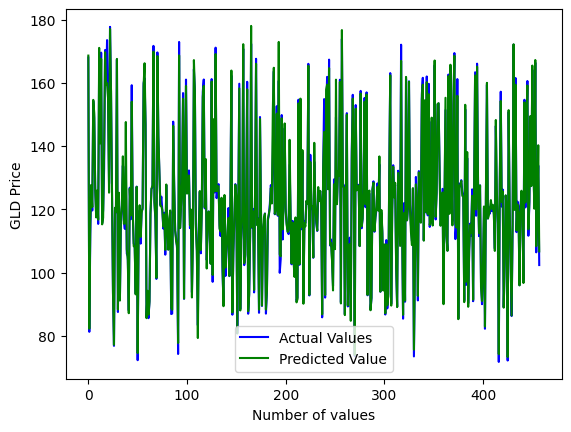

In [22]:
plt.plot(y_test , color = 'blue' , label = 'Actual Values')
plt.plot(test_data_prediciton , color = 'green' , label = 'Predicted Value')
plt.xlabel("Number of values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()


#### Function to predict gold price
    """
    Predict gold price based on input features.
    
    Parameters:
    new_data (list or array): Input features in the same order as the model expects (except 'Date' and 'GLD')

    Returns:
    float: Predicted gold price
    """

In [24]:
def predict_gold_price(new_data):

    # Convert the new data to a NumPy array and reshape for a single prediction
    new_data = np.array(new_data).reshape(1, -1)
    
    # Standardize the input data using the fitted scaler
    new_data_scaled = scaler.transform(new_data)
    
    # Predict the gold price using the trained regressor
    predicted_price = regressor.predict(new_data_scaled)
    
    return predicted_price[0]  # Return the predicted gold price

# Example usage 
new_input = [1447.160034  ,78.470001 , 15.1800 , 1.471692]  
predicted_price = predict_gold_price(new_input)

print(f"Predicted Gold Price: {predicted_price:.2f}")

Predicted Gold Price: 84.95


/Users/pavansaipendry/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
